In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat('E:\Mat_Work\machine-learning-ex6\ex6\ex6data1.mat')
X = mat['X']
y = mat['y']

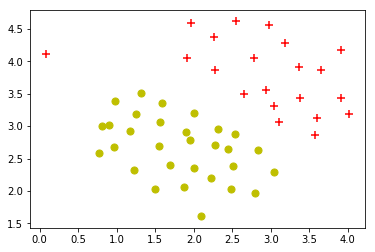

In [3]:
(m,n) = X.shape
pos = (y==1).reshape(m,1)
neg = (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c='r',marker='+',s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c='y',marker='o',s=50)

In [4]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X,np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(1.5, 5)

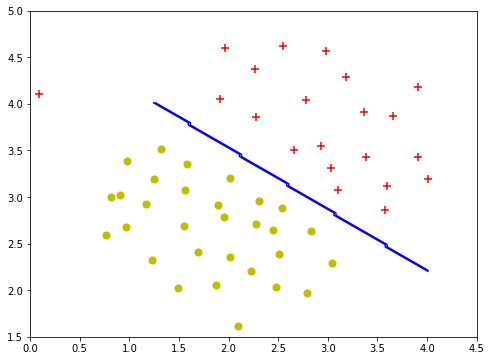

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

X1 = np.linspace(X[:,0].min(),X[:,0].max(),100)
X2 = np.linspace(X[:,1].min(),X[:,0].max(),100)
X_1,X_2 = np.meshgrid(X1,X2)
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [6]:
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

(1.5, 5)

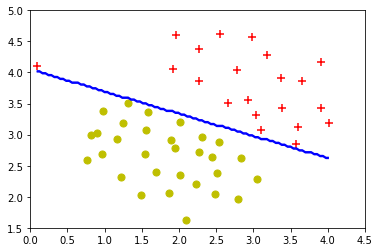

In [7]:
plt.plot(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c='r',marker='+',s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c='y',marker='o',s=50)

X1 = np.linspace(X[:,0].min(),X[:,0].max(),100)
X2 = np.linspace(X[:,1].min(),X[:,1].max(),100)
X_1,X_2 = np.meshgrid(X1,X2)
plt.contour(X_1,X_2,classifier2.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors='b')
plt.xlim(0,4.5)
plt.ylim(1.5,5)

(0.4, 1)

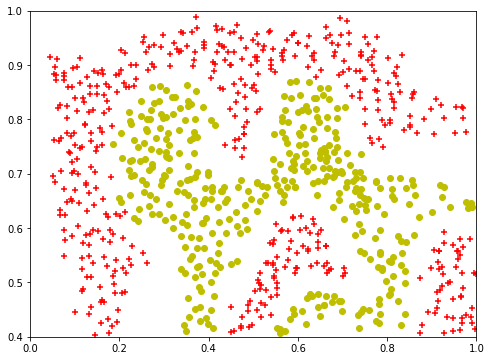

In [8]:
mat2 = loadmat('E:\Mat_Work\machine-learning-ex6\ex6\ex6data2.mat')
X2 = mat2['X']
y2 = mat2['y']
(m2,n2) = X2.shape
pos2 = (y2==1).reshape(m2,1)
neg2 = (y2==0).reshape(m2,1)
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c='r',marker='+')
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c='y',marker='o')
plt.xlim(0,1)
plt.ylim(0.4,1)

In [9]:
classifier3 = SVC(kernel='rbf',gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(0.4, 1)

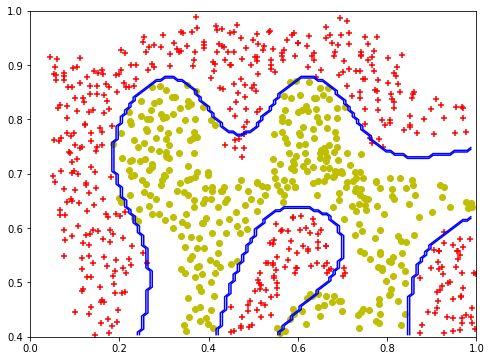

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

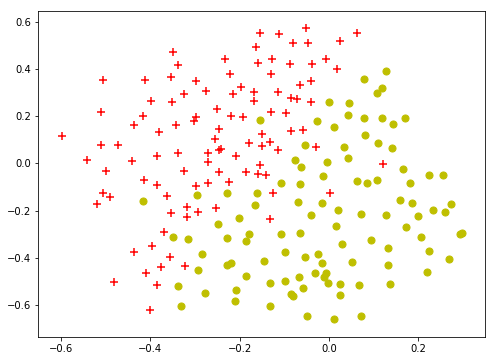

In [11]:
mat3 = loadmat('E:\Mat_Work\machine-learning-ex6\ex6\ex6data3.mat')
X3 = mat3['X']
y3 = mat3['y']
Xval = mat3['Xval']
yval = mat3['yval']

(m3,n3) = X3.shape
pos3 = (y3==1).reshape(m3,1)
neg3 = (y3==0).reshape(m3,1)
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c='r',marker='+',s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c='y',marker='o',s=50)

In [12]:
def dataset3Params(X,y,Xval,yval,vals):
    acc = 0
    best_c = 0
    best_gamma = 0
    for i in vals:
        C = i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

In [13]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(),vals)
classifier4 = SVC(C=C,gamma=gamma)
classifier4.fit(X3,y3.ravel())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

(-0.7, 0.5)

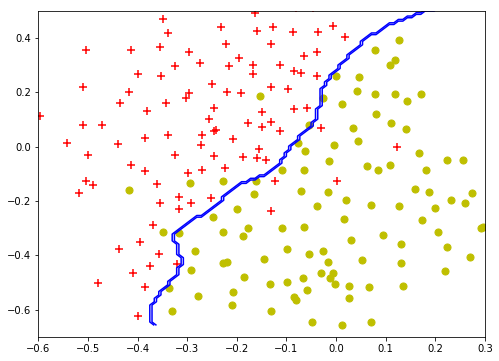

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c='r',marker='+',s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c='y',marker='o',s=50)

X7 = np.linspace(X3[:,0].min(),X3[:,0].max(),100)
X8 = np.linspace(X3[:,1].min(),X3[:,1].max(),100)
X_7,X_8 = np.meshgrid(X7,X8)
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),1,colors='b')
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)